# Mount GDrive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
import os
import zipfile
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten, TextVectorization
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from scipy.stats import linregress
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

# JSON Data

In [3]:
#@title Default title text
%%writefile content.json
{"intents":
 [
  {
      "tag":"greeting",
      "input":["hello", 
               "halo", 
               "hola",
               "hey",
               "hoy",
               "yo",
               "ahoy",
               "sup",
               "hey there", 
               "hi",                 
               "hi there", 
               "hya", 
               "hya there",
               "good morning",
               "good afternoon",
               "good evening",
               "good night",
               "salute",
               "hello how do you do",
               "how are you",
               "morning",
               "afternoon",
               "evening",
               "night",
               "dear traveloka",
               "long time no see",
               "hello it's been a while",
               "what's up",
               "hi, lovely to meet you",
               "hello good to see you",
               "yo good to see you",
               "nice to meet you",
               "hello what's up",
               "hello how are you",
               "hi night",
               "hi morning",
               "salute mate",
               "hello bot",
               "bot can you help me",
               "can you help me",
               "good morning, can you help me",
               "good afternoon, can you help me",
               "good night, can you help me",
               "hello, i need a help",
               "hey there, i need a help",
               "yo can you help me",
               "hi bot can you help me",
               "hi how are you",
               "dear traveloka can you help me",
               "mate can you give me a hand",
               "hello bot can you give me hand",
               "hi i need an assist",
               "hoy i need an assist",
               "yo give me a hand please",
               "yo give me an assist please",
               "morning, can you give me a hand",
               "night, can you give me hand",
               "good afternoon, can you give me a hand",
               "hello can you lend me a hand",
               "please lend me a hand",
               "morning, can you lend me a hand",
               "good afternoon, can you lend me a hand",
               "night can you lend me a hand",
               "good evening can you lend me a hand",
               "yo lend me a hand please",
               "hey there, can you lend me a hand",
               "hey there give me an assist please",
               "hello bot, help me solve this problem please",
               "hi good to see you again",
               "morning good to see you again",
               "night good to see you again",
               "hi there i need a help",
               "hey there i need a help can you help me",
               "good afternoon bot, glad to see you again",
               "good evening bot, glad to see you again"],
      "responses":[
          "Hi, welcome to Traveloka Chatbot.\nHow can i help you?"
      ]
  },
  {
      "tag":"general_payment_info",
      "input":["how to pay my order", 
               "pay an order", 
               "pay my book",
               "has my payment been received",
               "traveloka bank account details",
               "traveloka bank account info",
               "what is the traveloka bank account",
               "where should i pay", 
               "how should i pay the order",
               "payment confirmation and verification",                 
               "how will i receive a one-time password (OTP) to complete my payment",
               "why should i enter the one-time password (OTP) to proceed with my transaction? i've never had to do this before",
               "what is one-time password (OTP)",
               "why i get this one-time password (OTP)", 
               "my business travel expense reimbursement claim", 
               "credit card transaction not successful",
               "how to check my transaction if it's already success",
               "how to confirm my payment if it's already success",
               "how do i know my payment already success",
               "i paid wrong amount",
               "i paid more than the amount",
               "i paid less than the amount",
               "how to pay my order with ATM",
               "can i pay with my ATM",
               "how to pay my order by credit card",
               "can i pay with my credit card",
               "paying by transfer",
               "can i pay by transfering",
               "how to pay for my order",
               "credit card transaction not successful",
               "my payment got declined",
               "how do i know if my payment not got declined",
               "can i check my payment status",
               "payment status",
               "where i can check my payment status",
               "i don't know how to pay my order",
               "can you help me pay the order",
               "info about payment please",
               "how to do payment please",
               "i'm stuck, tell me how to pay my order",
               "what if i paid wrong amount",
               "can you help me, i paid more than i must to be",
               "can i pay it twice since lastly i pay less than the amount",
               "where should i transfer to pay the order",
               "give me payment guide please",
               "any info about how to do payment",
               "i need help how to pay my order",
               "ATM transaction not successful",
               "my credit card payment declined",
               "can you help me, i paid wrong amount",
               "i want to check my payment status, how",
               "what should i do with this one-time password (OTP)",
               "why should i pay my order",
               "should i for pay for my booking that being cancel",
               "i want to cancel my book, should i pay for it",
               "step to step how to pay my order please",
               "any info regarding how to pay an order",
               "my ATM transaction got stuck",
               "whick bank that traveloka accept for payment",
               "what if i dont want to pay the order",
               "i pay less than the bill, what should i do",
               "i pay more than the bill, what should i do",
               "do you accept visa for payment",
               "do you accept credit card for payment",
               "do you accept paypal for payment",
               "do you accept iBanking for payment",
               "do you accept kiosk for payment",
               "steps to pay via credit card pls",
               "steps to pay via ibanking please",
               "steps to pay via kiosk",
               "what if my payment proof is missing",
               "how to claim the reimbursement for my business travel",
               "i want to claim reimbursement, where i can get it",
               "payment proof is missing",
               "i paid the order but my payment receipt is missing",
               "my payment receipt is gone, what should i do",
               "i want to pay for the order in foreign currency, can i do it",
               "i got this Unsuccessful Credit Card Transaction, what is the problem i dont understand",
               "what method do you accept for the payment",
               "give me a guide regarding payment via visa",
               "give me a guide regarding payment via kiosk",
               "give me step by step payment via credit card",
               "give me step by step payment via ibanking",
               "i want to pay the order via internet banking, do you accept it",
               "how much that i should pay for the covid test"],
      "responses":[
          "Hi, for further information, please click the following link below \n\nHow to Pay:\nhttps://www.traveloka.com/en-en/how-to/pay \n\nGeneral Information about Payment:\nhttps://www.traveloka.com/en-en/help/general-info/general-information-payment/general-payment-info"
      ]
  },
    {
      "tag":"booking_flights",
      "input":["booking flights",
               "book a flight",
               "book a flight for me",
               "how to booking flights?",
               "i want to booking flights, can you tell me how",
               "where can i booking flights",
               "can you tell me how to book flights",
               "can you help me booking flights",
               "i need help for booking flights",
               "i got a problem while booking a flight, can you help me",
               "i need to book a flight, can you help me",
               "i need to book a flight for me, how to do that",
               "give me a guide for booking a flight",
               "i need a guide for booking a flight",
               "booking flight guide",
               "can we book a flight in this pandemic era",
               "booking flight pandemic era guideline",
               "booking flight guidance",
               "tell me how to book a flight",
               "how to booking a flight during this pandemic era",
               "i need to know how to book a flight",
               "booking flight info pls",
               "need to book a flight",
               "info about booking flight please",
               "can you give me steps about how to book a flight in Traveloka",
               "step by step about booking flight please",
               "booking flight instruction please",
               "where can i get an instruction about book a flight",
               "any clue about how to book a flight",
               "i need a direction about booking flight",
               "any reference about how to booking flight here",
               "what should i do after search my flight",
               "when i can get my flight ticket",
               "what should i do after choose my flight that i wanted",
               "should i fill in contact information to finish my flight booking process",
               "what should i do after fill in contact information to finish my flight booking process",
               "how long i need to wait to get my ticket flight",
               "what should i do if in 60 minutes im not get my flight ticket yet",
               "what should i do after finish my payment to finish my flight booking process",
               "what is the first step to book a flight",
               "should i finish my payment to get my flight ticket",
               "how long does it take to book a flight",
               "How to Correct a Flight Passenger Name",
               "can i correct a flight passenger name since i write it wrong",
               "i write the flight passenger name wrong, can i change and correct it",
               "why haven't i received my flight e-ticket",
               "how long till i get my flight e-ticket after i paid for it",
               "How to Find My flight E-ticket",
               "i already book a flight and paid it, i want to check my flight e-ticket, wheren can i found it",
               "can i check my flight status",
               "Flight Status Unavailable",
               "How to Correct Passenger Date of Birth and Passport Number",
               "i fill the wrong date of birth when i book a flight, can i change it",
               "i fill the wrong date of birth when i book a flight, what should i do",
               "i fill the wrong passport number, how can i change it",
               "i fill the wrong passport number, what should i do to change it",
               "About Flight Status",
               "can i know my flight status",
               "what if the flight status is unavailable",
               "Flight Status Terms",
               "what does this flight status mean",
               "is there any further explanation regarding this flight status",
               "where can i found my flight e-ticket",
               "should i download this flight e-ticket",
               "Sharing a Flight Status",
               "can i share my flight status",
               "is it save to share my flight status",
               "i already book a flight, but i dont understand this flight status, can you explain it",
               "i write down my sister name wrong in this flight passenger section, can i change it",
               "i write down my brother passport number wrong, how can i change it",
               "i write down my father date of birth wrong, can you help me to change it",
               "i dont have flight e-ticket, can i check my flight status",
               "can i check my flight status even though i dont have any flight ticket",
               "what does this flight status mean",
               "flight status is scheduled, what it means",
               "flight status is final call, what it means",
               "flight status is delayed, what it means",
               "flight status is in air, what it means",
               "flight status is landed, what it means",
               "i want to share my flight status, is it okay",
               "can i know this flight status terms means",
               "how to correct a wrong passport number filled when book a flight",
               "how to correct a wrong date of birth filled",
               "how to correct a wrong name filled in flight e-ticket",
               "Missing Data on Your Flight Status"],
      "responses":[
          "Hi, for further information and steps regarding booking flights, please click the following link below \n\nHow to Book Flights:\nhttps://www.traveloka.com/en-sg/how-to/bookhotel \n\nGeneral Information about Book Flights:\nhttps://www.traveloka.com/en-en/help/flight/flight-managing-booking/flight-booking-information"
      ]
  },
    {
      "tag":"booking_hotels",
      "input":["booking hotels",
               "book a hotel",
               "book a hotel for me",
               "how to booking hotels",
               "i want to booking hotels, can you tell me how",
               "where can i booking hotels",
               "can you tell me how to book hotels",
               "can you help me booking hotels",
               "i need help for booking hotels",
               "i got a problem while booking a hotel, can you help me",
               "i need to book a hotel for me, how to do that",
               "give me a guide for booking a hotel",
               "i need a guide for booking a hotel",
               "booking hotel guide",
               "can we book a hotel in this pandemic era",
               "booking hotel pandemic era guideline",
               "booking hotel guidance",
               "tell me how to book a hotel",
               "how to booking a hotel during this pandemic era",
               "i need to know how to book a hotel",
               "booking hotel info pls",
               "need to book a hotel",
               "info about booking hotel please",
               "can you give me steps about how to book a hotel in Traveloka",
               "step by step about booking hotel please",
               "booking hotel instruction please",
               "where can i get an instruction about book a hotel",
               "any clue about how to book a hotel",
               "i need a direction about booking hotel",
               "any reference about how to booking hotel here",
               "what should i do after search my hotel",
               "when i can get my hotel",
               "what should i do after choose my hotel that i wanted",
               "should i fill in contact information to finish my hotel booking process",
               "what should i do after fill in contact information to finish my hotel booking process",
               "how long i need to wait to get my hotel",
               "what should i do if in 60 minutes im not get my hotel yet",
               "what should i do after finish my payment to finish my hotel booking process",
               "what is the first step to book a hotel",
               "should i finish my payment to get my hotel",
               "how long does it take to book a hotel",
               "can i see hotel check-in/check-out time when book a hotel",
               "i want to book a room",
               "give me a guide how to book a room pls",
               "how to know if my hotels booking has been confirmed",
               "hotel early check-in when book a room",
               "what does each price include when i book a room",
               "how to make a special request for my villas & apartments booking",
               "can i pay for my booking by cash at the accomodation",
               "can i check my booking status since i already pay for it",
               "can i know the hotel facilities if im gonna book a hotel",
               "will my credit card get charged during booking",
               "can i make a request to add more bed during book a room",
               "can you help me booking a room",
               "can i request an early check in during booking a room",
               "how long does it take to book a room",
               "can i know my room facilities when booking a hotel",
               "does the name on the credit card used in a booking have to be the same as the name of the guest in the booking when book a room",
               "what is About StayGuarantee",
               "did i get StayGuarantee when i book a room",
               "can i request an extra bed",
               "step by step about booking a room please",
               "i need an instruction please for booking hotel pls",
               "need to book a room",
               "where can i get an instruction about book a room",
               "i want to book a room at singapore hotels, can you help me",
               "i want to go to singapore, can you help me book a room",
               "i want to add more bed, can i do it",
               "any clue about how to book a room",
               "booking room guidance",
               "can i book a smoking room",
               "i want to request a smoking room, can i",
               "i want to book an extra bed and a smoking room",
               "book a room pandemic era guideline",
               "how to book a room in this pandemic era",
               "i already pay the order, how long i need to wait for the hotels",
               "can i know the hotel facilities if im gonna book one",
               "i want to book a room, i need an instruction please",
               "tell me step to step how to book a room please",
               "is it okay to book a hotel in this pandemic era"],
      "responses":[
          "Hi, for further information and steps regarding booking hotels, please click the following link below\n\nHow to Book Hotels:\nhttps://www.traveloka.com/en-sg/how-to/bookhotel \n\nGeneral Information about Booking Hotels:\nhttps://www.traveloka.com/en-en/help/hotel/accommodation-booking/booking"
      ]
  },
  {
      "tag":"hotel_recommendation",
      "input":["give me hotel recommendation",
               "give me hotel suggestion to stay",
               "give me hotel reference to stay",
               "give me recommended hotels list to stay",
               "show me best hotel to stay", 
               "show me best hotel for holiday", 
               "show me best hotel for a break", 
               "show me best hotel for staycation", 
               "show me best BnB for staycation", 
               "show me best lodge for staycation", 
               "gimme hotel recommendation",
               "gimme hotel suggestion to stay",
               "gimme hotel reference to stay",
               "gimme hotel references",
               "gimme recommended hotels list for staycation",
               "gimme recommended hotels list for vacation",    
               "gimme recommended hotels list for holiday",    
               "gimme recommended hotels list for a break",  
               "gimme recommended BnB list for staycation",
               "gimme recommended BnB list for vacation",     
               "can you show me hotel recommendation",
               "can you give me hotel recommendation",
               "can you give me BnB recommendation",
               "can you give me BnB recommendation",
               "can you suggest me some hotels for holiday",
               "can you suggest me some hotels for vacation",
               "can you suggest me some hotels for staycation",
               "can you suggest me some hotels for a break",
               "can you recommend me some hotels for holiday",
               "can you recommend me some hotels for vacation",
               "can you recommend me some hotels for staycation",
               "could you suggest me some hotels for holiday",
               "could you suggest me some hotels for vacation",
               "could you suggest me some hotels for staycation",
               "could you suggest me some hotels for a break",
               "could you give me some hotel recommendation", 
               "please give me hotel reference for vacation",
               "please show me some hotel suggestion",
               "please recommend some hotel for holiday",
               "please give me some hotel recommendation", 
               "what is the most recommended hotel?", 
               "what is the best hotel for vacation?",
               "what is the best hotel for holiday",
               "what is the best hotel for staycation",
               "what is the best lodge for vacation?",
               "what is the best lodge for holiday",
               "any hotel recommendation?",  
               "any hotel suggestion?",  
               "suggest me some hotels for a vacation",
               "suggest me some for staycation",  
               "recommend me some hotels for vacation",
               "recommended hotel near me",
               "recommended hotel around me",
               "recommended hotel lists",
               "recommended BnB near me",
               "recommended BnB around me",
               "recommended BnB lists",
               "recommended motel near me",
               "recommended motel around me",
               "recommended motel lists",
               "where is the best hotel for vacation", 
               "where is recommended hotel",
               "what is the best hotel in this city?",
               "what is the best lodge in this city?",
               "hotels recommendation near me",
               "hotels recommendation", 
               "hotel suggestion",
               "motels recommendation near me",
               "motels recommendation", 
               "motels suggestion",
               "best place to stay",               
               "best hotel for vacation",               
               "best hotel for holiday",               
               "recommended hotel for staycation",
               "recommended hotel for holiday",
               "recommended hotel for a break",
               "recommended hotel to stay",
               "best hotel for staycation",
               "best hotel to stay",
               "i want to go for holiday, please give me hotel recommendation",
               "i want to go for a vacation, any hotel recommendation?",
               "i wanna go for staycation, gimme hotel recommendation",
               "i wanna go for vacation, gimme hotel references",
               "i need a break, gimme hotel recommendation",
               "i need holiday, please give me hotel suggestion"],
      "responses":[
          "In which city you will stay?",
          "Where will you stay?",
          "Which city will you stay in?"
        ]
    },
    {
      "tag":"restaurant_recommendation",
      "input":["give me restaurant recommendation",
               "give me a good restaurant recommendation",
               "give me resto recommendation",
               "give me some restaurant references for lunch",
               "give me good cafe recommendation",
               "give me recommended restaurant lists in here",
               "gimme good restaurant recommendation",
               "gimme some restaurant references for dinner",
               "gimme good cafe recommendation",
               "gimme most popular restaurant lists",
               "gimme recommended cafe lists",
               "can you give me restaurant recommendation?",
               "can you give me recommended restaurants list?",
               "can you give me recommended resto lists?",
               "can you give me restaurats suggestion?",
               "can you show me restaurant recommendation?",
               "can you show me recommended restaurants list?",
               "can you show me recommended resto lists?",
               "can you show me restaurats suggestion?",       
               "could you give me restaurant recommendation?",
               "could you give me resto recommendation?",
               "could you give me recommended restaurants list?",
               "could you give me recommended cafe list?",
               "could you please give me recommended resto lists?",
               "could you please give me restaurats suggestion?",
               "could you show me restaurant recommendation?",
               "could you show me cafe recommendation?",
               "could you show me recommended restaurants list?",
               "could you please show me recommended resto lists?",
               "could you please show me restaurats suggestion?",              
               "where is the best restaurant?",
               "where is the best place to eat",
               "where is recommended restaurant",
               "where is the most recommended restaurant",
               "recommend me some good restaurants",
               "recommend me good place to eat",
               "recommended restaurant near me",
               "recommended eatery near me",
               "recommended restaurant around me",
               "recommended cafe near me",
               "what's the most popular restaurant in here",             
               "what's the most recommended cafe here",
               "what's the most recommended eatery here",
               "what's the most recommended restaurant here",
               "what is the most famous cafe in this city",
               "what is the most famous cafe in this city",
               "what is the most popular cafe in here",
               "what is the most popular restaurant in here",
               "what is the most popular resto in here",
               "what is the most recommended restaurant here",
               "what restaurant is good",
               "restaurant recommendation",
               "restaurant recommendation for dinner",
               "restaurant recommendation for lunch",
               "restaurant recommendation for dating",
               "restaurant references for a date",
               "restaurant references for dinner",
               "restaurant references for lunch",
               "any good restaurant suggestion?",
               "any good cafe recommendation?",
               "any good resto recommendation?",
               "any good eatery recommendation?",
               "best eatery near me",
               "best restaurant in this city",
               "best cafe in here",
               "best resto near me",
               "best restaurant near me",
               "please give me some restaurants recommendation",
               "show me some recommended restaurants",
               "show me recommended restaurants list",
               "show me the most recommended restaurant in here",
               "good restaurants recommendation",
               "good cafe recommendation",
               "good resto recommendation",
               "I want to eat, give me a list of good restaurants",
               "I'm looking for food, show me best restaurant lists",
               "I'm hungry, give me restaurant lists",
               "I wanna eat, any resto recommendation?",
               "I am starving, please give me restaurant recommendation"],
      "responses":[
          "In which city is the restaurant you are looking for?",
          "Where are you currently?",
          "In which city are you currently?"
        ]
    },
    {
      "tag":"hotel_reschedule",
      "input":["i want to reschedule my hotel",
               "how to reschedule my hotel?",
               "how to reschedule my date",
               "how can i reschedule my hotel",
               "how to reschedule my stay date",
               "how to get instruction to reschedule hotel",
               "i need instruction about reschedule hotel room",
               "tell to me how reschdule my hotel",
               "can i reschedule my hotel?",
               "can you tell to me how to reschedule my hotel room",
               "can you help me to reschedule the date?",
               "can you help me to reschedule my hotel room?",
               "give me a guide for reschedule my hotel room",
               "can you give me step by step to reschedule the date",
               "reschedule hotel room guide",
               "where i can get information about reschedule hotel room",
               "any clue about how to reschedule my hotel room",
               "tell me how reschedule hotel room",
               "i want to reschedule my hotel room",
               "reschedule hotel room please",
               "info about reschedule hotel room",
               "step by step to reschedule hotel room",
               "any reference about how to reschedule hotel room",
               "where i can know about reschedule hotel room",
               "where i can get an instruction to reschedule hotel room",
               "i need to reschedule hotel room",
               "i need to reschedule my stay date",
               "i need a direction about reschedule hotel room",
               "i need help for reschedule hotel room",
               "i need help to reschedule my stay room",
               "i need to know how to reschedule my hotel room",
               "can i reschedule now?",
               "give me a guide about reschedule hotel room",
               "i'd like to reschedule my hotel",
               "i must reschedule my hotel",
               "i think i wanna reschedule my hotel",
               "can i do reschedule hotel room",
               "give me information about hotel reschedule",
               "tell to me information about reschedule my hotel room",
               "can i get information about reschedule my hotel room?",
               "i want to reschedule my hotel room",
               "i want to reschedule my accomodation",
               "how to reschedule my accomodation",
               "can i reschedule my accomodation",
               "can you help me to reschedule my hotel room",
               "can you tell to me how to reschedule hotel room",
               "is it possible to reschedule my hotel?",
               "can i change my staying date",
               "is there any possibility to change my stay date?",
               "Hotel reschedule",
               "hotel booking reschedule", 
               "Can you explain how to reschedule my hotel?", 
               "Can i reschedule my hotel?", 
               "how do i reschedule my hotel?",
               "how do i know if i already reschedule my hotel room?",
               "how to get my money back after reschedule hotel room",
               "how to check if i already reschedule my hotel room",
               "i need to know how to reschedule hotel room",
               "can i check if i reschedule my hotel room",
               "why i need to reschedule my date?",
               "step by step to reschedule hotel room",
               "i want to proses reschedule for hotel room",
               "i got problem to reschedule my hotel room",
               "give me information about reschedule",
               "reschedule hotel room information please",
               "reschedule hotel instruction please",
               "i need to reschedule intruction now",
               "Way to reschedule hotel", 
               "How to check hotel reschedule policy?", 
               "show to me how to reschedule hotel room",
               "please give me how to reschedule hotel room",
               "check hotel reschedule policy", 
               "hotel reschedule policy",  
               "reschedule hotel booking",
               "any reference to reschedule the date?",
               "please show to me where i can reschedule my hotel room",
               "hotel reschedule info please",
               "hotel booking reschedule info please"],
      "responses":[
          "Hi, for further information and steps regarding hotel rescheduling, please click the following link \nhttps://www.traveloka.com/en-en/reschedule/hotel"
        ]
    },
    {
      "tag":"flight_reschedule",
      "input":["i want to reschedule my flight",
               "how to reschedule my flight?",
               "how to reschedule my date",
               "how can i reschedule my flight",
               "how to get instruction to reschedule my flight",
               "i need instruction about flight reschedule",
               "tell to me how reschdule my flight",
               "can i reschedule my flight?",
               "can you tell to me how to reschedule my flight",
               "can you help me to flight reschedule",
               "give me a guide for flight reschedule",
               "can you give me step by step to reschedule the date",
               "flight reschedule guide",
               "where i can get information about flight reschedule ",
               "any clue about how to reschedule my flight",
               "tell me flight reschedule",
               "i want to reschedule my flight",
               "flight reschedule please",
               "info about flight reschedule",
               "step by step to know flight reschedule",
               "any reference about how to flight reschedule",
               "where i can know about flight reschedule",
               "where i can get an instruction to flight reschedule",
               "i need flight reschedule",
               "i need to reschedule my flight date",
               "i need a direction about flight reschedule",
               "i need help for flight reschedule",
               "i need help to reschedule my flight",
               "i need to know how to reschedule my flight",
               "can i reschedule now?",
               "give me a guide about flight reschedule",
               "i'd like to reschedule my flight",
               "i must reschedule my flight",
               "i think i wanna reschedule my flight",
               "can i do flight reschedule",
               "give me information about flight reschedule",
               "tell to me information about flight reschedule",
               "can i get information about flight reschedule?",
               "i want to reschedule my flight time",
               "can you help me to reschedule my flight time",
               "can you tell to me how to flight time reschedule",
               "is it possible to reschedule my flight time?",
               "can i change my flight date time?",
               "is there any possibility to change my flight date?",
               "flight ticket reschedule",
               "flight reschedule", 
               "ticket booking reschedule", 
               "Can you explain how to reschedule my flight date?", 
               "Can i reschedule my flight ticket?", 
               "how do i reschedule my flight ticket?",
               "how do i know if i already reschedule my flight time?",
               "how to get my money back after reschedule my flight ticket",
               "how to check if i already reschedule my ticket",
               "i need to know how to reschedule flight time",
               "can i check if i reschedule my flight time?",
               "why i need to reschedule my date and my time?",
               "step by step to flight reschedule",
               "i want to proses for flight reschedule",
               "i got problem to reschedule my flight ",
               "give me information about flight reschedule",
               "flight reschedule information please",
               "flight reschedule instruction please",
               "i need to flight reschedule intruction now",
               "Way to flight reschedule ticket", 
               "How to check flight reschedule policy?", 
               "show to me how to flight reschedule",
               "please give me how to flight reschedule",
               "check flight reschedule policy", 
               "flight reschedule policy",  
               "reschedule flight booking",
               "any reference to reschedule the date?",
               "please show to me where i can reschedule my flight date",
               "flight time reschedule info please",
               "flight date reschedule info please"],
      "responses":[
          "Hi, for further information and steps regarding flight rescheduling, please click the following link \nhttps://www.traveloka.com/en-en/reschedule/flight"
        ]
    },
  {
      "tag":"hotel_refund",
      "input":["Hotel refund", 
               "hotel booking refund",
               "Can you explain how to refund my hotel?",
               "Can you explain how to refund my hotel booking?", 
               "Can i refund my hotel?", 
               "Can i refund my hotel booking?", 
               "how do i refund my hotel?", 
               "Way to refund hotel", 
               "How to check hotel refund policy?", 
               "check hotel refund policy", 
               "hotel refund policy",
               "hotel booking refund policy", 
               "Can i have my money back from cancel my hotel booking", 
               "cancel hotel booking",
               "hotel cancelation",
               "hotel booking cancelation",
               "can you give me hotel refund information",
               "please give me hotel refund info",
               "i'd like to refund my hotel",
               "i think i wanna cancel my hotel",
               "how to do hotel refund",
               "how to do hotel cancelation",
               "i want to refund my hotel",
               "i want to cancel my hotel",
               "how to refund my hotel?",
               "how to cancel my hotel?",
               "can i refund my hotel?",
               "can i cancel my hotel?",
               "can i do hotel booking cancelation",
               "can i do hotel refund",
               "give me information about hotel refund",
               "give me information about hotel booking cancelation",
               "how can i refund my hotel",
               "how can i cancel my hotel booking",
               "i need to refund my hotel",
               "i need to cancel my hotel ",
               "i need to cancel my hotel booking",
               "i have to refund my hotel",
               "i have to cancel my hotel",
               "i have to cancel my hotel booking",
               "give me hotel refund info",
               "give me hotel cancelation info",
               "give me hotel booking cancelation info",
               "can you give me hotel refund information",
               "can you give me hotel cancelation information",
               "can you give me hotel booking cancelation information",
               "please give me hotel refund info",
               "please give me hotel refund info",
               "please give me hotel booking refund info",
               "please give me hotel booking refund info",
               "please give me hotel cancelation info",
               "please give me hotel booking cancelation info",
               "please give me hotel booking cancelation info",
               "please give me hotel cancelation info",
               "please share hotel refund info",
               "please share hotel refund info",
               "please share hotel booking refund info",
               "please share hotel booking refund info",
               "please share hotel cancelation info",
               "please share hotel booking cancelation info",
               "please share hotel booking cancelation info",
               "please share hotel cancelation info",
               "tell me hotel refund info",
               "tell me hotel refund info",
               "tell me hotel booking refund info",
               "tell me hotel booking refund info",
               "tell me hotel cancelation info",
               "tell me hotel booking cancelation info",
               "tell me hotel booking cancelation info",
               "tell me hotel cancelation info",
               "is there any possibility to refund my hotel?",
               "is there any possibility to refund my hotel booking?",
               "is there any possibility to cancel my hotel?",
               "is there any possibility to cancel my hotel booking?",
               "is it possible to refund my hotel",
               "is it possible to refund my hotel booking",
               "is it possible to cancel my hotel",
               "is it possible to cancel my hotel booking",
               "how to refund my hotel",
               "how to refund my hotel booking",
               "how to cancel my hotel",
               "how to cancel my hotel booking",
               "hotel refund info please",
               "hotel refund info please",
               "hotel booking refund info please",
               "hotel booking cancelation info please",
               "hotel booking cancelation info please",
               "hotel cancelation info please",
               "hotel cancelation info please"],
      "responses":[
            "Hi, thank you for contacting me! You can check this to get more information about hotel refund https://www.traveloka.com/en-id/refund#:~:text=Refund%20can%20be%20requested%20through,by%20visiting%20the%20Refund%20tab"
      ]
  },
  {
      "tag":"boarding_ticket_refund",
      "input":["Boarding ticket refund",
               "Flight ticket refund", 
               "Can i refund my flight ticket?", 
               "Can i refund my boarding ticket?", 
               "how do i refund my flight ticket?", 
               "Way to refund flight ticket", 
               "How to check flight refund policy?", 
               "check flight refund policy", 
               "flight refund policy", 
               "Can you explain how to refund my flight ticket?", 
               "Can you explain how to refund my boarding ticket?", 
               "Can i have my money back from cancel my flight booking", 
               "Can i have my money back from cancel my boarding booking", 
               "cancel flight ticket", 
               "cancel boarding ticket",
               "i want to refund my flight ticket",
               "i want to refund my boarding ticket",
               "how to refund my flight ticket?",
               "how to refund my boarding ticket?",
               "i'd like to refund my flight ticket",
               "i'd like to refund my boarding ticket",
               "i think i wanna refund my flight ticket",
               "i think i wanna refund my boarding ticket",
               "how to do flight ticket refund",
               "how to do boarding ticket refund",
               "can i do flight ticket refund",
               "can i do boarding ticket refund",
               "give me information about flight ticket refund",
               "give me information about boarding ticket refund",
               "how can i refund my flight ticket",
               "how can i refund my boarding ticket",
               "how can i cancel my boarding ticket",
               "how can i cancel my flight ticket",
               "i need to refund my flight ticket",
               "i need to refund my boarding ticket",
               "i need to cancel my flight ticket",
               "i need to cancel my boarding ticket",
               "i have to refund my flight ticket",
               "i have to refund my boarding ticket",
               "i have to cancel my flight ticket",
               "i have to cancel my boarding ticket",
               "please give me boarding refund info",
               "please give me flight refund info",
               "please give me boarding ticket refund info",
               "please give me flight ticket refund info",
               "please give me boarding cancelation info",
               "please give me flight cancelation info",
               "please give me boarding ticket cancelation info",
               "please give me flight ticket cancelation info",
               "please share boarding refund info",
               "please share flight refund info",
               "please share boarding ticket refund info",
               "please share flight ticket refund info",
               "please share boarding cancelation info",
               "please share flight cancelation info",
               "please share boarding ticket cancelation info",
               "please share flight ticket cancelation info",
               "tell me boarding refund info",
               "tell me flight refund info",
               "tell me boarding ticket refund info",
               "tell me flight ticket refund info",
               "tell me boarding cancelation info",
               "tell me flight cancelation info",
               "tell me boarding ticket cancelation info",
               "tell me flight ticket cancelation info",
               "tell me how to refund boarding ticket",
               "tell me how to refund flight ticket",
               "tell me how to cancel boarding ticket",
               "tell me how to cancel flight ticket",
               "give me flight refund info",
               "give me boarding refund info",
               "can you give me flight refund information",
               "can you give me boarding refund information",
               "please give me flight refund info",
               "please give me boarding refund info",
               "is there any possibility to refund my flight ticket?",
               "is there any possibility to refund my boarding ticket?",
               "is there any possibility to cancel my flight ticket?",
               "is there any possibility to cancel my boarding ticket?",
               "is it possible to refund my flight ticket",
               "is it possible to refund my boarding ticket",
               "is it possible to cancel my flight ticket",
               "is it possible to cancel my boarding ticket",
               "flight ticket refund info please",
               "boarding ticket refund info please",
               "flight ticket cancelation info please",
               "boarding ticket cancelation info please"],
      "responses":[
            "Hi, thank you for contacting me! You can check this link to get more information about flight ticket refund https://www.traveloka.com/en-id/help/v2/flight/flight-managing-booking/flight-changes/refund/how-to-cancel-and-refund",
            "Hello, thank you for contacting me! You can see in the link below about ticket refund https://www.traveloka.com/en-id/help/v2/flight/flight-managing-booking/flight-changes/refund/how-to-cancel-and-refund"
      ]
  },
  {
      "tag":"call_center",
      "input":["what is the call center number",
               "what is the call center contact",
               "what is the call center contact number",
               "what's the call center number",
               "what's the call center contact",
               "what's the call center contact number",
               "what is the customer service number",
               "what is the customer service contact",
               "what is the customer service number",
               "what's the customer service number",
               "what's the customer service contact",
               "what's the customer service contact number",   
               "can i have the call center number",
               "can i have the call center contact number",
               "can i have the customer service number",
               "can i have the customer service contact number",
               "can i contact the call center",
               "can you give me the call center number?",
               "can i contact the customer service",
               "can i call customer service",
               "can you give me the call center number?",
               "can you give me the customer service number?",
               "could you please give me call center number", 
               "could you please give me customer service number", 
               "may i have the call center number?",
               "may i have the customer service number?",
               "how to call the call center",                
               "how to call the customer service",                
               "how to contact the call center",
               "how to contact call center",
               "how to contact customer service",
               "how can i reach the call center?",
               "how can i reach the customer service?",
               "how to reach call center number",
               "how to reach customer service number",
               "how to can i contact call center",
               "how to can i contact the customer service",
               "give me call center number",
               "give me customer service contact number",
               "gimme call center number",
               "gimme customer service number",
               "give me call center information",
               "give me customer service contact information",
               "gimme call center information",
               "gimme customer service contact information",
               "please give me the call center number", 
               "please give me the customer service number", 
               "call center contact number",
               "call center number, please",
               "call center information",  
               "customer service information",  
               "call center info",  
               "customer service info",  
               "customer service contact number",
               "customer service number, please",
               "Is there any information about the call center number?",               
               "Is there any information about the customer service number?",              
               "Any information about the call center number?",               
               "Any information about the customer service number?",              
               "i need the call center number",
               "i need the customer service number",
               "is there any call center number that i can contact?",
               "is there any customer service number that i can contact?",
               "I need to contact the call center immediately, can you give me the number?",
               "I need to contact the call center immediately, could you please give me the number?",
               "I need to contact the customer service immediately, could you please give me the number?",
               "I've got important things to ask, give me the call center number",
               "I've got important things to ask, give me the customer service number",
               "I need the call center number immediately",              
               "I need the customer service number immediately",
               "I need the call center number",
               "I need the customer service number",
               "I got important things to ask, give me the call center number",
               "I got important things to ask, give me the customer service number",
               "I have to contact the call center, please give me the number",
               "I have to contact the customer service, please give me the number"],
      "responses":[
          "Hi, please contact our call center via the following number \n+44-2031-399-21 (Global)\n+62-21-2910-3300 (Indonesia)\n+65-6911-8138 (Singapore)"
        ]
    },
  {
  "tag":"travel_credit",
  "input":["can i redeem my travel credit",
           "can i get back my travel credit?",
           "can i retrieve my travel credit?",
           "can i get back my travel credit",
           "can i reclaim my travel credit",
           "can you give me information to redeem travel credit",  
           "can you give me info to redeem travel credit",  
           "can you give me information about how to to redeem travel credit",  
           "can you give me info about how to to redeem travel credit",  
           "can you give me information to retrieve travel credit",  
           "can you give me info to retrieve travel credit",  
           "can you give me information about how to to retrieve travel credit",  
           "can you give me info about how to to retrieve travel credit",         
           "could you please give me information to redeem travel credit",  
           "could you please give me info to redeem travel credit",  
           "could you please give me information about how to to redeem travel credit",  
           "could you please give me info about how to to redeem travel credit",  
           "could you give me information to retrieve travel credit",  
           "could you give me info to retrieve travel credit",  
           "could you give me information about how to to retrieve travel credit",  
           "could you give me info about how to to retrieve travel credit", 
           "how to redeem my travel credit voucher", 
           "how to redeem my travel credit",
           "how to get my travel credit back?",
           "how to retrieve travel credit",
           "how to regain travel credit",
           "how to reclaim my travel credit",
           "how can i regain my travel credit?",  
           "travel credit redeem info",
           "travel credit redeem information",  
           "travel credit reclaim",
           "i want to get my travel credit back",
           "i want to reclaim my travel credit",      
           "i want to redeem travel credit", 
           "i want to regain my travel credit",         
           "i need to get my travel credit back",
           "i need to reclaim my travel credit",      
           "i need to redeem travel credit", 
           "i need to regain my travel credit",
           "I think i want to get my travel credit back",
           "I think i want to reclaim my travel credit",      
           "I think i want to redeem travel credit", 
           "I think i want to regain my travel credit",  
           "give me travel credit redeem tutorial",
           "give me travel credit redeem information",
           "give me travel credit reclaim tutorial",
           "give me travel credit reclaim information",
           "give me travel credit retrieval tutorial",
           "give me travel credit retrieval information",
           "gimme travel credit redeem tutorial",
           "gimme travel credit redeem information",
           "gimme travel credit reclaim tutorial",
           "gimme travel credit reclaim information",
           "gimme travel credit retrieval tutorial",
           "gimme travel credit retrieval information",
           "I'd like to redeem my travel credit",
           "I'd like to regain my travel credit",
           "I'd like to retrieve my travel credit",
           "I'd like to get my travel credit back",
           "is there any travel credit redeem information?", 
           "is there any travel credit retrieval information?",
           "is there any chance to redeem my travel credit?",
           "is there any chance to get back my travel credit?",
           "is there any possibility to get my travel credit back?",
           "is there any possibility to redeem my travel credit?",
           "is there any possibility to reclaim my travel credit?",
           "is it possible to redeem my travel credit?",
           "is it possible get my travel credit back?",
           "i think i want to redeem my travel credit",
           "i think i want to reclaim my travel credit",
           "i think i want to retrieve my travel credit",
           "i think i want to get my travel credit back",
           "i need to redeem my travel credit",
           "i need to regain my travel credit",
           "i need to reclaim my travel credit",
           "i need to retrieve my travel credit",
           "travel credit redeem",
           "travel credit retrieval",
           "travel credit reclaim",       
           "please give me information how to regain my travel credit",
           "I want to redeem my travel credit, how to do that?",
           "I think i need to redeem travel credit, how can i do it?"],
  "responses":[
      "Hi, for further information and steps regarding airlines travel credit, please click the following link \nhttps://www.traveloka.com/en-id/travel-credit-information"
    ]
  },
  {
      "tag":"closing",
      "input":["okay",
               "okay bye",
               "okay thanks",
               "okay thanks, i'm out",
               "okay thank you",
               "okay thank you so much",
               "okay thank you very much",
               "ok",
               "ok bye",
               "ok thanks",
               "ok thanks, i'm out",
               "ok thank you",
               "ok thank you so much",
               "ok thank you very much",
               "kay",
               "cheers mate",
               "Okey-dokey",
               "goodbye",
               "bye",
               "bye-bye",
               "farewell",
               "adieu",
               "adios",
               "godspeed",
               "bon voyage",
               "thank you",
               "thanks",
               "thanks mate",
               "thanks bruh",
               "thanks yo!",
               "thanks dude",
               "thanks a million",
               "thanks a ton",
               "thanks a lot",
               "thanks a bunch",
               "thanks so much",
               "thanks, see ya!",
               "thanks for the info",
               "thanks for the help",
               "thanks for helping me",
               "thanks for yout help",
               "thanks for yout assistance",
               "thank you so much",
               "thank you very much",
               "thx",
               "thx u",
               "tysm",
               "tyvm",
               "ty",
               "that's helpful",
               "alright thanks",
               "alright good",
               "alright thanks for your information",
               "I owe you one",
               "Shout-out",
               "You’re awesome!",
               "You’re great!",
               "You’re cool!",
               "You’re the best!",
               "You’re a life safer",
               "You’re so helpful",
               "You made this easy",
               "You rock",
               "I appreciate it",
               "I appreciate your help",
               "I'm impressed",
               "I owe you one",
               "I really owe you one",
               "I humbly thank you",
               "Gracias",
               "Merci",
               "Many thanks",
               "All I can say is, Thanks!",
               "Cant thank you enough",
               "A million thanks to you"],
      "responses":[
            "My pleasure, happy to help. See you again!"
      ]
  }
 ]
}

Writing content.json


# Parsing the Data

In [32]:
#import dataset
with open('content.json') as content:
  data = json.load(content)

In [33]:
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
# remove punctuations and stop words
def parse_text(text):
  
    text = re.sub("[^a-zA-Z]", ' ', text)

    text = text.lower().split()

    stop_words = set(stopwords.words("english"))
    text = [word for word in text if word not in stop_words]

    text = " ".join(text)

    return text

In [35]:
#move the data to lists
tags = []
inputs = []
responses={}
for intent in data['intents']:
  responses[intent['tag']]=intent['responses']
  for rows in intent['input']:
    rows = parse_text(rows)
    inputs.append(rows)
    tags.append(intent['tag'])

In [36]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})
data

,inputs,tags
0,hello,greeting
1,halo,greeting
2,hola,greeting
3,hey,greeting
4,hoy,greeting
...,...,...
1045,merci,closing
1046,many thanks,closing
1047,say thanks,closing
1048,cant thank enough,closing


# Train - Test Split

In [37]:
#Global variables

sentences = data['inputs']
labels = data['tags']
train_size = 0.8
EMBEDDING_DIM = 100
MAXLEN = 11
TRUNCATING = 'post'
PADDING = 'post'
unique_tags = 13

In [38]:
from sklearn.model_selection import train_test_split

def train_val_split(sentences, labels, train_size):
    train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(sentences, labels, train_size=train_size, random_state=42)
    return train_sentences, validation_sentences, train_labels, validation_labels

In [39]:
train_sentences, val_sentences, train_labels, val_labels = train_val_split(sentences, labels, train_size)

print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 840 sentences for training.

There are 840 labels for training.

There are 210 sentences for validation.

There are 210 labels for validation.


# Data Preprocessing

## Tokenizing

In [40]:
def fit_tokenizer(data, oov_token):
  # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
  tokenizer = Tokenizer(num_words=1000, oov_token=oov_token)

  # Fit the tokenizer to the training sentences
  tokenizer.fit_on_texts(data)

  return tokenizer

In [41]:
tokenizer = fit_tokenizer(data['inputs'], "<OOV>")

word_index = tokenizer.word_index
vocab_size = len(word_index)
print("number of unique words: ", vocab_size)

number of unique words:  336


## Sequences, truncating and padding

In [42]:
def seq_pad_and_trunc(sentences, tokenizer, padding, truncating, maxlen):
       
    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)
    
    # Pad the sequences using the correct padding, truncating and maxlen
    x_train = pad_sequences(sequences, maxlen=maxlen, padding=padding, truncating=truncating)
    
    return x_train

In [43]:
train_pad_trunc_seq = seq_pad_and_trunc(train_sentences, tokenizer, PADDING, TRUNCATING, MAXLEN)
val_pad_trunc_seq = seq_pad_and_trunc(val_sentences, tokenizer, PADDING, TRUNCATING, MAXLEN)

print(f"Padded and truncated training sequences have shape: {train_pad_trunc_seq.shape}\n")
print(f"Padded and truncated validation sequences have shape: {val_pad_trunc_seq.shape}")

Padded and truncated training sequences have shape: (840, 11)

Padded and truncated validation sequences have shape: (210, 11)


In [44]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
input_shape = train_pad_trunc_seq.shape[1]

#### Encoding

In [58]:
# Encoding tags for train and validation datasets

train_labels = LabelEncoder().fit_transform(train_labels)
val_labels = LabelEncoder().fit_transform(val_labels)

## Embedding

In [45]:
embeddings_index = {}
f = open('/content/gdrive/MyDrive/ChatBot/glove/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [48]:
EMBEDDING_MATRIX = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        EMBEDDING_MATRIX[i] = embedding_vector

# Modelling

In [65]:
def create_nlp_model(vocab_size, output_length, embedding_dim, embedding_matrix, maxlen):
  model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=True),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
      tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(1e-6), activity_regularizer=tf.keras.regularizers.L1(1e-6)),
      tf.keras.layers.Dropout(0.009),
      tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-6), activity_regularizer=tf.keras.regularizers.L2(1e-6)),
      tf.keras.layers.Dropout(0.01),
      tf.keras.layers.Dense(output_length, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])
  return model

In [66]:
model = create_nlp_model(vocab_size, unique_tags, EMBEDDING_DIM, EMBEDDING_MATRIX, MAXLEN)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 11, 100)           33700     
                                                                 
 bidirectional_8 (Bidirectio  (None, 11, 128)          84480     
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 16)                1040      
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 16)               

In [67]:
history = model.fit(train_pad_trunc_seq, train_labels, epochs=150, validation_data=(val_pad_trunc_seq, val_labels))

Epoch 1/150
27/27 [==============================] - 10s 98ms/step - loss: 2.5616 - accuracy: 0.0857 - val_loss: 2.5533 - val_accuracy: 0.1381
Epoch 2/150
27/27 [==============================] - 1s 32ms/step - loss: 2.5414 - accuracy: 0.1619 - val_loss: 2.5351 - val_accuracy: 0.1619
Epoch 3/150
27/27 [==============================] - 1s 31ms/step - loss: 2.5170 - accuracy: 0.1726 - val_loss: 2.5074 - val_accuracy: 0.1905
Epoch 4/150
27/27 [==============================] - 1s 30ms/step - loss: 2.4825 - accuracy: 0.2048 - val_loss: 2.4680 - val_accuracy: 0.2095
Epoch 5/150
27/27 [==============================] - 1s 31ms/step - loss: 2.4349 - accuracy: 0.2214 - val_loss: 2.4129 - val_accuracy: 0.2190
Epoch 6/150
27/27 [==============================] - 1s 30ms/step - loss: 2.3665 - accuracy: 0.2429 - val_loss: 2.3377 - val_accuracy: 0.2238
Epoch 7/150
27/27 [==============================] - 1s 31ms/step - loss: 2.2851 - accuracy: 0.2476 - val_loss: 2.2416 - val_accuracy: 0.2571
Epoch

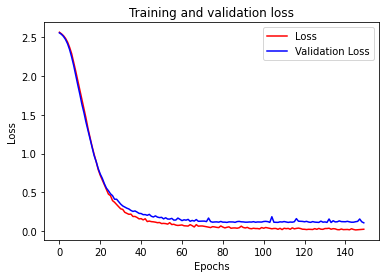

In [68]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss = history.history['loss']
val_loss = history.history['val_loss']

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(loss, 'r')
plt.plot(val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

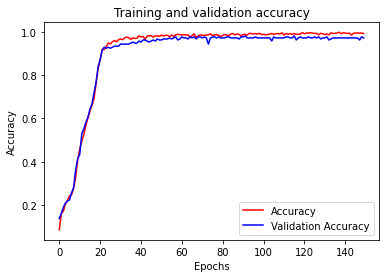

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(acc, 'r')
plt.plot(val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

In [ ]:
model.save("model.h5")